<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>Projeto II</center>
<center>ALUNO: Rafael Berg Medeiros Miranda</center>
</div>


<h3>- Importando as bibliotecas:

</h3>


In [252]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>- Importando os dados:

</h3>

In [253]:
df = pd.read_csv("police.csv")

<h3>- Registros policiais / Variáveis disponíveis:

</h3>

In [254]:
df.shape

(91741, 15)

<h3>- Dados faltosos:

</h3>

In [255]:
print(df.isna().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


<h3>- Excluindo as colunas:

</h3>

In [256]:
df.drop(['county_name','state'],axis=1,inplace=True)

<h3>- Apagando as linhas com os dados faltosos da seguinte coluna:

</h3>

In [257]:
df.dropna(subset=["driver_gender"], inplace=True)
df

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


<h4>Enquanto search_conducted consta como booleana, is_arrested consta como objeto para o pandas, porém se trata do tipo bool.</h4>


<h3>- Transformando o tipo da coluna (is_arrested) para booleano:

</h3>

In [258]:
df.is_arrested = df.is_arrested.astype( 'bool' )
print(df.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


<h3>- Juntando as colunas de datas e horas:

</h3>

In [259]:
format = '%Y-%m-%d %H:%M:%S'
df['stop_datetime'] = pd.to_datetime(df['stop_date'] + " " + df['stop_time'].astype("string"),format=format)


<h3>- Transformando a nova coluna de data e horas no index:

</h3>

In [260]:
df = df.set_index(pd.to_datetime(df["stop_datetime"]))
df

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00


<h3>- A infração mais comum e a menos notificada:

</h3>

In [261]:
series_v = df["violation"].value_counts()
vfreq = pd.DataFrame(series_v)
vfreq["Frequencia relativa"] = vfreq["violation"] / series_v.sum()
vfreq.loc["Total"] = [series_v.sum(),vfreq["Frequencia relativa"].sum()]
vfreq.rename(columns={'violation': 'Absoluta'},inplace=True)
vfreq

,Absoluta,Frequencia relativa
Speeding,48423.0,0.559571
Moving violation,16224.0,0.187483
Equipment,10921.0,0.126202
Other,4409.0,0.050950
Registration/plates,3703.0,0.042791
Seat belt,2856.0,0.033004
Total,86536.0,1.000000


<h4>Sendo a mais comum por velocidade e a menos comum por falta do uso do cinto de segurança</h4>
<br>
<br>

<h3>Motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações?</h3>
<h4>
- Frequência Absoluta:
</h4>

In [262]:
df_homens = df[df["driver_gender"]=="M"]
homens = df_homens["violation"].value_counts()

df_mulheres = df[df["driver_gender"]=="F"]
mulheres = df_mulheres["violation"].value_counts()

hfreq = pd.DataFrame(homens)
hfreq["Frequencia Absoluta (Homens)"] = homens
hfreq["Frequencia Absoluta (Mulheres)"] = mulheres
hfreq.drop(["violation"],axis=1,inplace=True); hfreq


,Frequencia Absoluta (Homens),Frequencia Absoluta (Mulheres)
Speeding,32777,15646
Moving violation,12938,3286
Equipment,8420,2501
Other,3702,707
Registration/plates,2647,1056
Seat belt,2278,578


<AxesSubplot:>

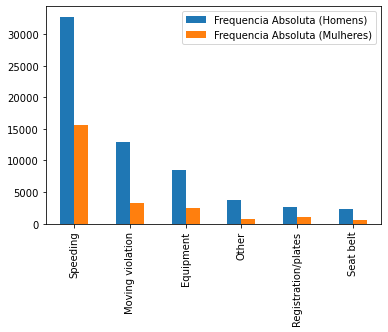

In [263]:
hfreq.plot.bar()

<h3>- Frequência Relativa:

</h3>

In [264]:
m_hfreq = pd.DataFrame(homens)

m_hfreq["Frequencia relativa (Homens)"] = homens / homens.sum()
m_hfreq["Frequencia relativa (Mulheres)"] = mulheres / mulheres.sum()

m_hfreq.drop(["violation"],axis=1,inplace=True)
m_hfreq.loc["Total"] = [m_hfreq["Frequencia relativa (Homens)"].sum(),m_hfreq["Frequencia relativa (Mulheres)"].sum()]
m_hfreq

,Frequencia relativa (Homens),Frequencia relativa (Mulheres)
Speeding,0.522243,0.658114
Moving violation,0.206144,0.138218
Equipment,0.134158,0.105199
Other,0.058985,0.029738
Registration/plates,0.042175,0.044418
Seat belt,0.036296,0.024312
Total,1.000000,1.000000


<AxesSubplot:>

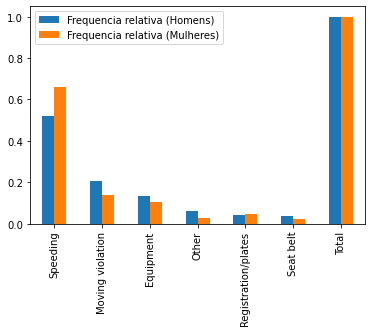

In [265]:
m_hfreq.plot.bar()

<h3>- Se o gênero influência na hora de multar:

</h3>

In [266]:
mulheres = df_mulheres["stop_outcome"].value_counts()
mulheres = pd.DataFrame(mulheres)
mulheres.rename(columns={"stop_outcome":"Absoluta (Mulheres)"},inplace=True)

paradas = pd.concat([df_homens["stop_outcome"].value_counts(), mulheres],axis=1)
paradas.rename(columns={"stop_outcome":"Absoluta (Homens)"},inplace=True)
paradas = paradas.head(2)

paradas["Frequencia relativa (Homens)"] = paradas["Absoluta (Homens)"] / paradas["Absoluta (Homens)"].sum()
paradas["Frequencia relativa (Mulheres)"] = paradas["Absoluta (Mulheres)"] / paradas["Absoluta (Mulheres)"].sum()
paradas

,Absoluta (Homens),Absoluta (Mulheres),Frequencia relativa (Homens),Frequencia relativa (Mulheres)
Citation,55840,21251,0.938629,0.934685
Warning,3651,1485,0.061371,0.065315


<h4>Como podemos ver, a diferença da frequência é desprezivel.
<br><br>
</h4>

<h3>O Gênero afeta na escolha de veículos a serem revistados?

</h3>

In [267]:
mulheres = df_mulheres["search_conducted"].value_counts()
mulheres = pd.DataFrame(mulheres)
mulheres.rename(columns={"search_conducted":"Absoluta (Mulheres)"},inplace=True)

buscas = pd.concat([df_homens["search_conducted"].value_counts(), mulheres],axis=1)
buscas.rename(columns={"search_conducted":"Absoluta (Homens)"},inplace=True)

buscas["Frequencia relativa (Homens)"] = buscas["Absoluta (Homens)"] / buscas["Absoluta (Homens)"].sum()
buscas["Frequencia relativa (Mulheres)"] = buscas["Absoluta (Mulheres)"] / buscas["Absoluta (Mulheres)"].sum()
buscas


,Absoluta (Homens),Absoluta (Mulheres),Frequencia relativa (Homens),Frequencia relativa (Mulheres)
False,59911,23318,0.954574,0.980819
True,2851,456,0.045426,0.019181


<h4> As mulheres tendem a ser revistadas menos que os homens, mas não chega a ser uma diferença grande.
<br><br>
</h4>

<h3>Taxa de pesquisa:

</h3>

In [268]:
total = df["driver_gender"].value_counts().sum()
df_qntd = pd.DataFrame(df["driver_gender"].value_counts())

df_qntd["Frequencia relativa"] = df_qntd["driver_gender"] / total
df_qntd


,driver_gender,Frequencia relativa
M,62762,0.72527
F,23774,0.27473


<h3>Taxa de infração para cada gênero

</h3>

In [269]:
rltv_m = df_mulheres.loc[df_mulheres["search_conducted"]==True]
rltv_m = rltv_m["violation"].value_counts(normalize=True)*100

rltv_h = df_homens.loc[df_homens["search_conducted"]==True]
rltv_h = rltv_h["violation"].value_counts(normalize=True)*100

df_rltv = pd.DataFrame([rltv_h,rltv_m],index={"Mulheres","0Homens"})
df_rltv

,Speeding,Moving violation,Equipment,Registration/plates,Other,Seat belt
0Homens,32.058927,27.920028,21.115398,10.101719,5.997895,2.806033
Mulheres,28.508772,28.289474,21.929825,12.719298,6.359649,2.192982


<h3>Taxa de prisões na coluna:

</h3>

In [270]:
df['is_arrested'].value_counts(normalize=True)*100

False    96.443099
True      3.556901
Name: is_arrested, dtype: float64

In [297]:
taxa = df["is_arrested"].mean(); taxa

0.0355690117407784

<h3>Taxa de prisões por hora:

</h3>

In [272]:
df1 = df
df1['stop_time'] = pd.to_datetime(df1['stop_time'])
df1 = df1.set_index('stop_time')

taxa_hrs = df1['is_arrested']
dftaxa = pd.DataFrame(taxa_hrs)
dftaxa = dftaxa.loc[dftaxa['is_arrested']==True]
dftaxa = dftaxa.groupby(pd.Grouper(freq='H')).sum()
hourly_arrest_rate = (dftaxa / dftaxa.sum()) * 100
hourly_arrest_rate

,is_arrested
stop_time,
2022-03-30 00:00:00,8.057180
2022-03-30 01:00:00,8.512021
2022-03-30 02:00:00,5.295647
2022-03-30 03:00:00,2.079272
2022-03-30 04:00:00,0.389864
2022-03-30 05:00:00,0.259909
2022-03-30 06:00:00,1.397011
2022-03-30 07:00:00,1.851852
2022-03-30 08:00:00,3.508772


In [273]:
hourly_arrest_rate.mean()

is_arrested    4.166667
dtype: float64

Text(0.5, 1.0, 'Taxa de Prisões por Hora do Dia')

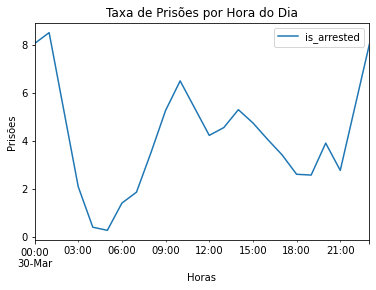

In [274]:
hourly_arrest_rate.plot()
plt.ylabel("Prisões")
plt.xlabel("Horas")
plt.title("Taxa de Prisões por Hora do Dia")


<h3>Taxa anual de drogas:

</h3>

In [275]:
taxa_drogas = df['drugs_related_stop']
dftaxa = pd.DataFrame(taxa_drogas)
dftaxa = dftaxa.loc[dftaxa['drugs_related_stop']==True]

annual_drug_rate = dftaxa.groupby(pd.Grouper(freq='Y')).sum()
annual_drug_rate = (annual_drug_rate/annual_drug_rate.sum())*100
annual_drug_rate

,drugs_related_stop
stop_datetime,
2005-12-31,1.856148
2006-12-31,8.468677
2007-12-31,8.352668
2008-12-31,7.192575
2009-12-31,8.236659
2010-12-31,8.352668
2011-12-31,8.700696
2012-12-31,11.948956
2013-12-31,11.484919


<AxesSubplot:xlabel='stop_datetime'>

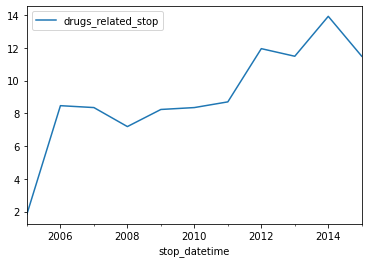

In [276]:
annual_drug_rate.plot()

<h3>O aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais?

</h3>

In [277]:
taxa_abd = df['search_conducted']
df_abd = pd.DataFrame(taxa_abd)
df_abd = df_abd.loc[df_abd['search_conducted']==True]

annual_search_rate = df_abd.groupby(pd.Grouper(freq='Y')).sum()
annual_search_rate = (annual_search_rate/annual_search_rate.sum())*100
annual_search_rate

,search_conducted
stop_datetime,
2005-12-31,3.658905
2006-12-31,12.700333
2007-12-31,12.035077
2008-12-31,10.069549
2009-12-31,10.825522
2010-12-31,9.676444
2011-12-31,8.315694
2012-12-31,10.553372
2013-12-31,6.864227


In [278]:
drogas_abd = pd.concat([annual_drug_rate,annual_search_rate], axis=1)
drogas_abd

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,1.856148,3.658905
2006-12-31,8.468677,12.700333
2007-12-31,8.352668,12.035077
2008-12-31,7.192575,10.069549
2009-12-31,8.236659,10.825522
2010-12-31,8.352668,9.676444
2011-12-31,8.700696,8.315694
2012-12-31,11.948956,10.553372
2013-12-31,11.484919,6.864227


<AxesSubplot:xlabel='stop_datetime'>

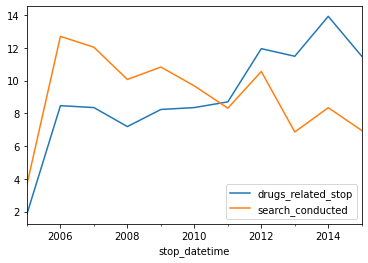

In [279]:
drogas_abd.plot()

<h3>Como as zonas se comparam em termos de quais infrações são detectadas pela polícia?

</h3>

In [280]:
pd.crosstab(df['district'], df['violation'])


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


<AxesSubplot:>

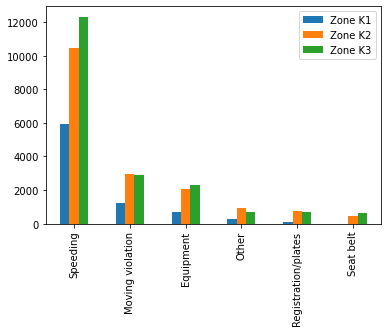

In [281]:
k1 = df.loc[df['district']=='Zone K1']
k1 = pd.DataFrame(k1['violation'].value_counts())
k1.rename(columns={'violation': 'Zone K1'}, inplace=True)

k2 = df.loc[df['district']=='Zone K2']
k2 = pd.DataFrame(k2['violation'].value_counts())
k2.rename(columns={'violation': 'Zone K2'}, inplace=True)

k3 = df.loc[df['district']=='Zone K3']
k3 = pd.DataFrame(k3['violation'].value_counts())
k3.rename(columns={'violation': 'Zone K3'}, inplace=True)
graf = pd.concat([k1,k2,k3], axis=1)
graf.plot.bar()

<h3>Importando os dados do segundo DataFrame:

</h3>

In [282]:
df2 = pd.read_csv('weather.csv')

<h3>Temperaturas:

</h3>

In [283]:
tmin = df2.groupby('TMIN').describe()
tmin

TAVG                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TMIN                                                                    
-5     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   1.0   
-3     3.0   8.000000  2.000000   6.0   7.00   8.0   9.00  10.0   3.0   
-2     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   2.0   
-1     3.0  15.333333  4.041452  13.0  13.00  13.0  16.50  20.0   3.0   
 0     2.0   9.500000  0.707107   9.0   9.25   9.5   9.75  10.0   2.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
 73    8.0  80.125000  2.900123  76.0  77.75  80.5  82.25  84.0  21.0   
 74    3.0  82.333333  1.527525  81.0  81.50  82.0  83.00  84.0  10.0   
 75    4.0  83.500000  1.290994  82.0  82.75  83.5  84.25  85.0  10.0   
 76    2.0  84.500000  0.707107  84.0  84.25  84.5  84.75  85.0   5.0   
 77    2.0  85.000000  1.414214  84.0  84.50  85.0  85.50  86.0   3.0   

                 ... WT21      WT22                                    
           mean  ...  75% max count mean std  min  25%  50%  75%  max  
TMIN             ...                                                   
-5    34.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-3    22.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-2    21.500000  ...  NaN NaN   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
-1    24.666667  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 0    20.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ..   ...  ...  ..  ...  ...  ...  ...  ...  
 73   89.476190  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 74   91.200000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 75   92.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 76   95.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 77   98.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  

[82 rows x 192 columns]

In [284]:
tavg = df2.groupby(['TAVG']).describe()
tavg

TMIN                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TAVG                                                                    
6.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
8.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
9.0    2.0   1.000000  1.414214   0.0   0.50   1.0   1.50   2.0   2.0   
10.0   2.0  -1.500000  2.121320  -3.0  -2.25  -1.5  -0.75   0.0   2.0   
11.0   3.0   3.666667  2.081666   2.0   2.50   3.0   4.50   6.0   3.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
82.0   6.0  71.500000  3.016621  67.0  70.00  71.5  73.75  75.0   6.0   
83.0   3.0  73.333333  1.527525  72.0  72.50  73.0  74.00  75.0   3.0   
84.0   5.0  75.000000  1.581139  73.0  74.00  75.0  76.00  77.0   5.0   
85.0   2.0  75.500000  0.707107  75.0  75.25  75.5  75.75  76.0   2.0   
86.0   1.0  77.000000       NaN  77.0  77.00  77.0  77.00  77.0   1.0   

                 ... WT21      WT22                               
           mean  ...  75% max count mean std min 25% 50% 75% max  
TAVG             ...                                              
6.0   18.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
8.0   20.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
9.0   18.500000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
10.0  24.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
11.0  17.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...         ...  ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
82.0  93.166667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
83.0  92.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
84.0  94.800000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
85.0  95.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
86.0  98.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[80 rows x 192 columns]

In [285]:
tmax = df2.groupby('TMAX').describe()
tmax

TAVG                                                   TMIN             \
     count   mean       std   min    25%   50%    75%   max count       mean   
TMAX                                                                           
15     1.0  11.00       NaN  11.0  11.00  11.0  11.00  11.0   2.0   4.500000   
16     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0   3.500000   
17     1.0   9.00       NaN   9.0   9.00   9.0   9.00   9.0   3.0   6.666667   
18     4.0  10.25  2.872281   6.0   9.75  11.5  12.00  12.0   5.0   3.400000   
19     2.0  14.50  3.535534  12.0  13.25  14.5  15.75  17.0   3.0   7.666667   
...    ...    ...       ...   ...    ...   ...    ...   ...   ...        ...   
98     1.0  86.00       NaN  86.0  86.00  86.0  86.00  86.0   2.0  74.000000   
99     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  72.000000   
100    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0  76.500000   
101    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  76.000000   
102    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  73.000000   

      ... WT21      WT22                               
      ...  75% max count mean std min 25% 50% 75% max  
TMAX  ...                                              
15    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
16    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
17    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
18    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
19    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...   ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
98    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
99    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
100   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
101   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
102   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[88 rows x 192 columns]

<AxesSubplot:>

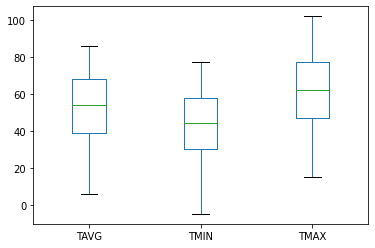

In [286]:
df2[['TAVG','TMIN','TMAX']].plot.box()

<h3>Diferença entre as temperaturas:

</h3>

<AxesSubplot:>

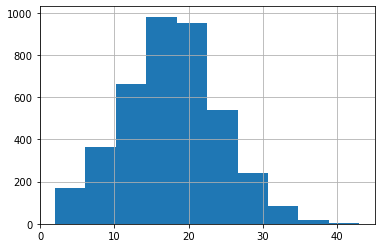

In [287]:
df2['TDIFF'] = df2['TMAX']-df2['TMIN']
df2['TDIFF'].hist()

A maior diferença de tempetura é vai de 15 à aproximadamente 23 graus

<br><h3>Preparando os DataFrames para serem mesclados:

</h3>

In [288]:
df['reset_index'] = df.index
df = df.reset_index(drop=True)

In [293]:
date = df2['DATE']
date = pd.to_datetime(date)

<h3>Mesclando os DataFrames:

</h3>

In [294]:
df3 = df.merge(df2, right_index=True, left_index=True, how='outer')

In [295]:
df3.set_index('reset_index', inplace=True)
df3

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
reset_index,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,2022-03-30 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
2005-01-23 23:15:00,2005-01-23,2022-03-30 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16.0
2005-02-17 04:15:00,2005-02-17,2022-03-30 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.0
2005-02-20 17:15:00,2005-02-20,2022-03-30 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0
2005-02-24 01:20:00,2005-02-24,2022-03-30 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,2022-03-30 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 21:59:00,2015-12-31,2022-03-30 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 22:04:00,2015-12-31,2022-03-30 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
